In [422]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [394]:
#read dataset
dataset = pd.read_csv('I:\PycharmProjects\Datasets\icml_face_data.csv')
print(dataset.shape)
print(dataset.head())

(35887, 3)
   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [395]:
#separate data into X and Y
emotions = dataset['emotion']
pixels = dataset['pixels']
print(emotions.head())
print(pixels.head())

0    0
1    0
2    2
3    4
4    6
Name: emotion, dtype: int64
0    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1    151 150 147 155 148 133 111 140 170 174 182 15...
2    231 212 156 164 174 138 161 173 182 200 106 38...
3    24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4    4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Name: pixels, dtype: object


In [407]:
#reshape pixels into images and normalize values
pixelList = pixels.tolist()
p = []
for i in pixelList:
    arr = []
    for num in i.split(' '):
        arr.append(num)
    arr = np.asarray(arr).reshape(48, 48)
    p.append(arr.astype('float32'))


In [408]:
p = np.asarray(p)
p = np.expand_dims(X, -1)
print(p)

[[[[ 70.]
   [ 80.]
   [ 82.]
   ...
   [ 52.]
   [ 43.]
   [ 41.]]

  [[ 65.]
   [ 61.]
   [ 58.]
   ...
   [ 56.]
   [ 52.]
   [ 44.]]

  [[ 50.]
   [ 43.]
   [ 54.]
   ...
   [ 49.]
   [ 56.]
   [ 47.]]

  ...

  [[ 91.]
   [ 65.]
   [ 42.]
   ...
   [ 72.]
   [ 56.]
   [ 43.]]

  [[ 77.]
   [ 82.]
   [ 79.]
   ...
   [105.]
   [ 70.]
   [ 46.]]

  [[ 77.]
   [ 72.]
   [ 84.]
   ...
   [106.]
   [109.]
   [ 82.]]]


 [[[151.]
   [150.]
   [147.]
   ...
   [129.]
   [140.]
   [120.]]

  [[151.]
   [149.]
   [149.]
   ...
   [122.]
   [141.]
   [137.]]

  [[151.]
   [151.]
   [156.]
   ...
   [109.]
   [123.]
   [146.]]

  ...

  [[188.]
   [188.]
   [121.]
   ...
   [185.]
   [185.]
   [186.]]

  [[188.]
   [187.]
   [196.]
   ...
   [186.]
   [182.]
   [187.]]

  [[186.]
   [184.]
   [185.]
   ...
   [193.]
   [183.]
   [184.]]]


 [[[231.]
   [212.]
   [156.]
   ...
   [ 44.]
   [ 27.]
   [ 16.]]

  [[229.]
   [175.]
   [148.]
   ...
   [ 27.]
   [ 35.]
   [ 27.]]

  [[214.]
   [15

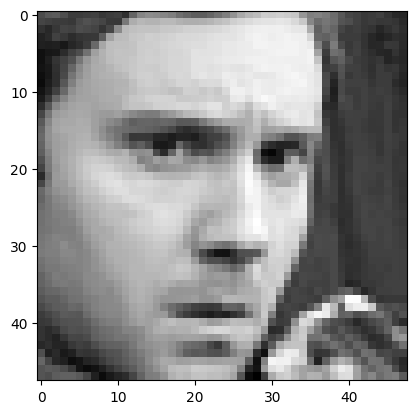

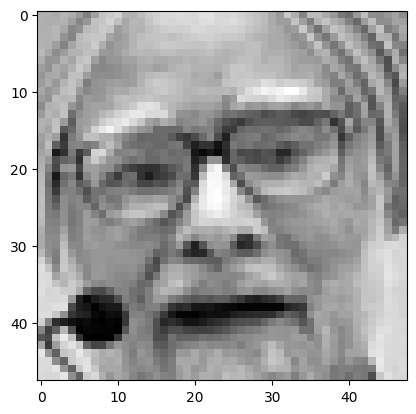

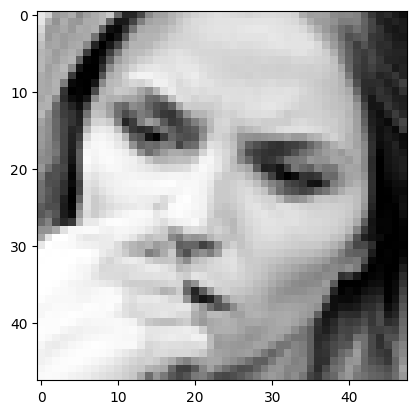

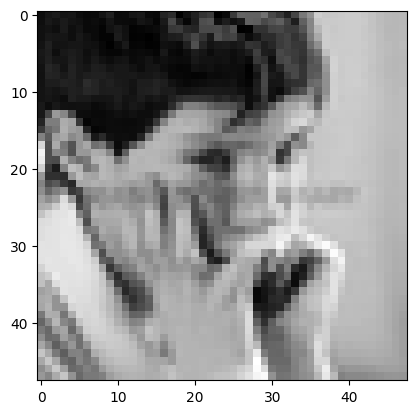

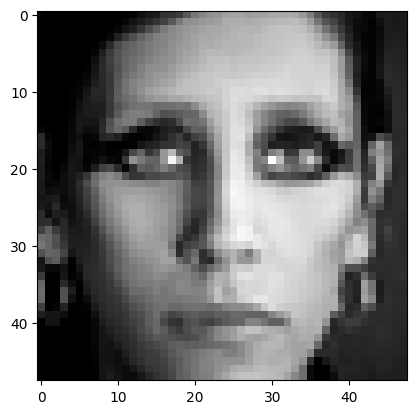

In [409]:
#show first 5 images of data
for i in range(5):
    plt.figure(i)
    plt.imshow(p[i], cmap='gray')
plt.show()

In [416]:
#split data into train and test subsets
xtrain, xtest, ytrain, ytest = train_test_split(p, emotions, test_size=0.1, shuffle=True)
print("xtrain shape: ", xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("xtest shape: ", xtest.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (32298, 48, 48, 1)
ytrain shape:  (32298,)
xtest shape:  (3589, 48, 48, 1)
ytest shape:  (3589,)


In [418]:
#parameters
learningRate = 0.001
batch = 64
epochs = 5
imgSize = (48,48,1)
classes = 7

In [417]:
#transform the label data to a binary matrix so that it can work with the loss function
ytrain = keras.utils.to_categorical(ytrain, classes)
ytest = keras.utils.to_categorical(ytest, classes)

In [413]:
#define the CNN and print the summary
model = keras.Sequential([
    keras.Input(shape=(48,48,1)),

    # Here we normalize the input image and rescale the rgb values from the range [0,255] to [0,1]
    keras.layers.Rescaling(scale=1./255, input_shape=(imgSize)), 

    #first convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    #second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    #third convolutional block
    layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    #fourth convolutional block
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    

    #Fully connected layer
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    

    #Output Layer
    layers.Dense(classes, activation='softmax')
    
])

model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_51 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_267 (Conv2D)         (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_257 (Ba  (None, 46, 46, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_261 (MaxPooli  (None, 23, 23, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_233 (Dropout)       (None, 23, 23, 32)        0         
                                                                 
 conv2d_268 (Conv2D)         (None, 21, 21, 64)      

In [419]:
#define the loss function and optimizer with the learning rate
optim = keras.optimizers.Adam(learning_rate=learningRate)
lossFn = tf.keras.losses.CategoricalCrossentropy() 

#Compile and Train the model
model.compile(loss=lossFn, optimizer=optim, metrics=["accuracy"])
stats = model.fit(xtrain, ytrain, batch_size=batch, epochs=epochs, validation_split=0.1)

Epoch 1/5
455/455 [==============================] - 74s 162ms/step - loss: 1.0823 - accuracy: 0.5934 - val_loss: 1.0334 - val_accuracy: 0.5972
Epoch 2/5
455/455 [==============================] - 73s 160ms/step - loss: 1.0406 - accuracy: 0.6094 - val_loss: 0.9959 - val_accuracy: 0.6149
Epoch 3/5
455/455 [==============================] - 73s 160ms/step - loss: 1.0172 - accuracy: 0.6169 - val_loss: 0.9860 - val_accuracy: 0.6372
Epoch 4/5
455/455 [==============================] - 73s 160ms/step - loss: 0.9864 - accuracy: 0.6283 - val_loss: 1.0440 - val_accuracy: 0.6034
Epoch 5/5
455/455 [==============================] - 73s 160ms/step - loss: 0.9632 - accuracy: 0.6353 - val_loss: 1.0501 - val_accuracy: 0.6071


In [420]:
#Evaluate the model on the test data
results = model.evaluate(xtest, ytest)
print("ACCURACY:", results[1])

113/113 [==============================] - 3s 26ms/step - loss: 1.0095 - accuracy: 0.6278
ACCURACY: 0.6277514696121216


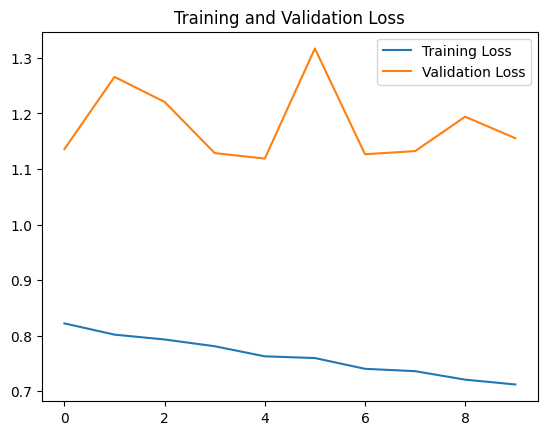

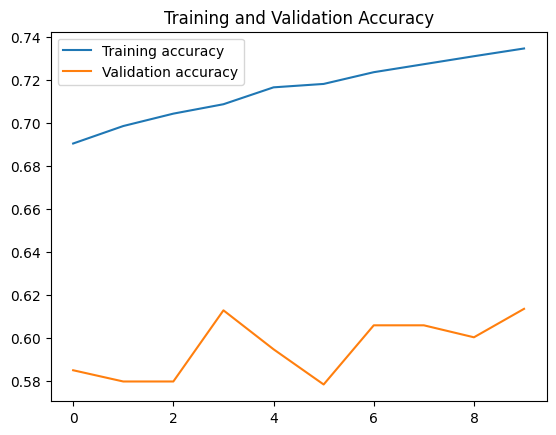

In [356]:
#Graph the losses and accuracies
plt.plot(range(epochs), stats.history["loss"])
plt.plot(range(epochs), stats.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Training and Validation Loss")
plt.show()
plt.plot(range(epochs), stats.history["accuracy"])
plt.plot(range(epochs), stats.history["val_accuracy"])
plt.legend(["Training accuracy", "Validation accuracy"])
plt.title("Training and Validation Accuracy")
plt.show()